In [23]:
setwd('/import/DB/fel/BJTC-204')

In [24]:
library(Seurat)

In [25]:
library(CytoTRACE)

### 1）输入数据
<!-- 
原始单细胞count表达矩阵：行名为基因名，列名为细胞名的dataframe/matrix；
细胞类型标签：字符串格式。值表示注释的细胞类型；名字对应表达矩阵的行名。
降维坐标(optional)：dataframe格式，包含两列。行名对应表达矩阵 -->的列名。

In [26]:
sce = readRDS('./remove.mic6.rds')

In [28]:
Idents(sce) = 'celltype'
DefaultAssay(sce) = 'RNA'


sce.markers <- FindAllMarkers(object = sce, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster Mic4

Calculating cluster Mic0

Calculating cluster Mic2

Calculating cluster Mic1

Calculating cluster Mic3

Calculating cluster Mic5



In [29]:
library(dplyr)
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.2.3"


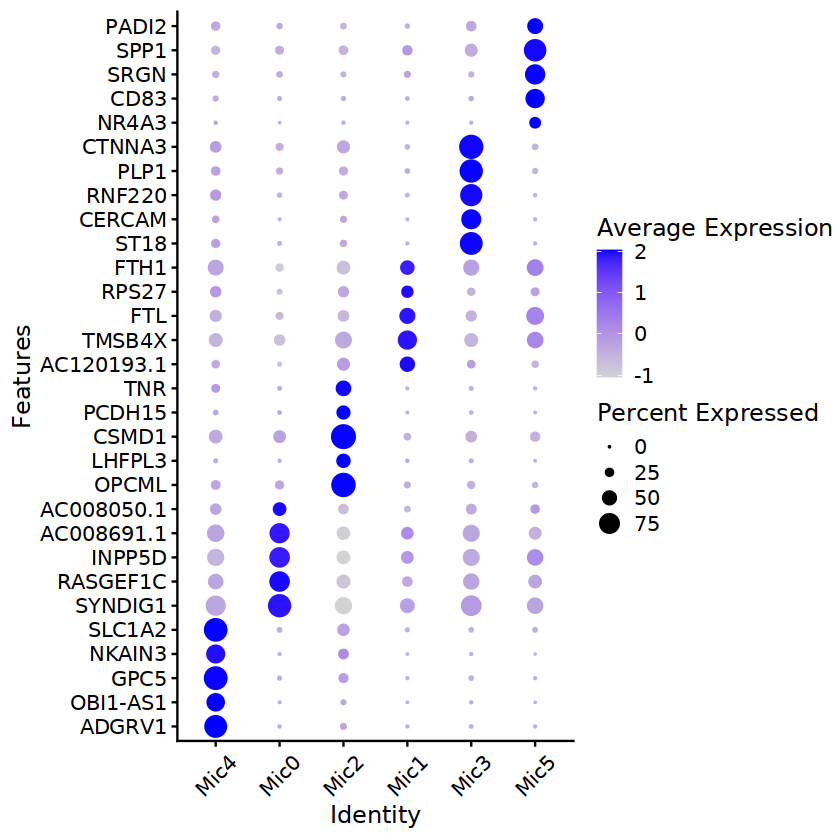

In [30]:
DotPlot(sce, features = unique(top5$gene),
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [33]:
library('clusterProfiler')
library('org.Hs.eg.db')

In [34]:
library(dplyr) 
top50 <- sce.markers %>% group_by(cluster) %>% top_n(50, avg_log2FC)
group <- data.frame(gene=top50$gene,
                    group=top50$cluster)

Gene_ID <- bitr(top50$gene, fromType="SYMBOL", 
            toType="ENTREZID", 
            OrgDb="org.Hs.eg.db")
data  <- merge(Gene_ID,group,by.x='SYMBOL',by.y='gene')
data_GO <- compareCluster(
  ENTREZID~group, 
  data=data, 
  fun="enrichGO", 
  OrgDb="org.Hs.eg.db",
  ont = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff = 0.05,
  qvalueCutoff = 0.05,
  readable = TRUE
)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(top50$gene, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
"4.86% of input gene IDs are fail to map..."


In [39]:
options(repr.plot.height = 8)

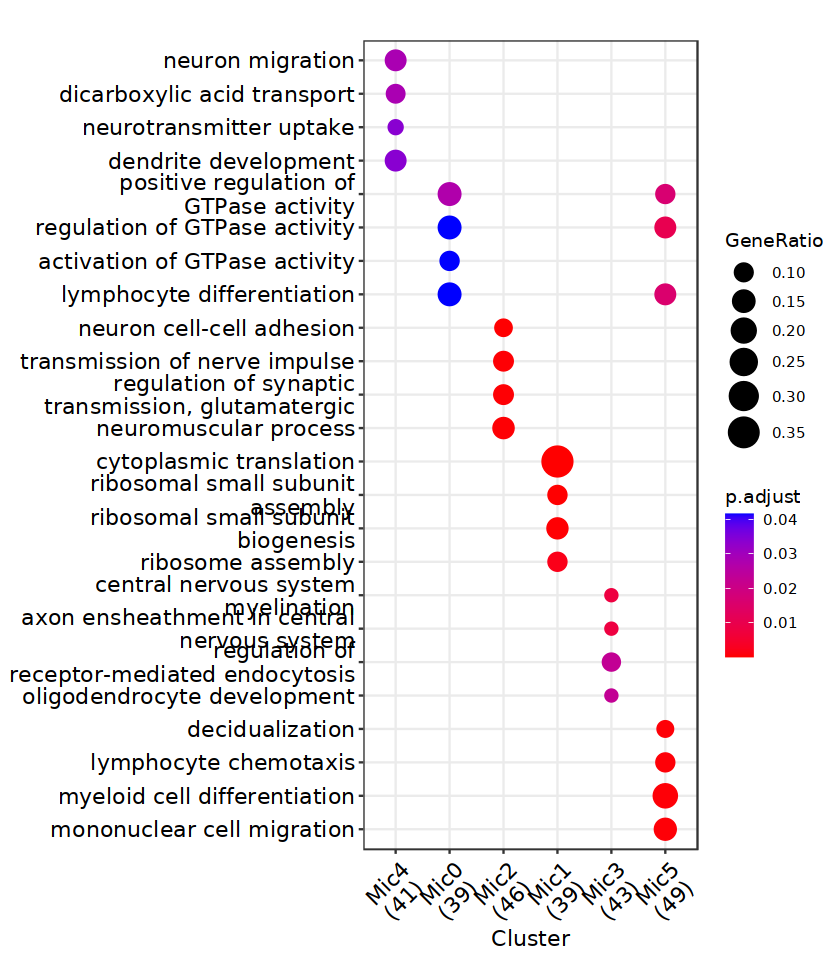

In [41]:
enrichplot::dotplot(data_GO, showCategory=4,font.size = 13)+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [42]:
#  抑郁症患者中 1 5 减少  线粒体有关的胶质细胞减少